In [15]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from random import randint

## Texture Synthesis

Implements Efros and Leung’s approach, to synthesize a 200x200 pixel image for each of the five example images

In [14]:
# hyperparameters and other global variables
input_path = '/Users/advithchegu/Desktop/Rutgers/Spring 22/Computer Vision/hw/Assignment2/samples/'
output_path = '/Users/advithchegu/Desktop/Rutgers/Spring 22/Computer Vision/hw/Assignment2/out/'
out_height = 200
out_width = 200
window_size = 5
sample_img = 'T1.gif'
ErrThreshold = 0.1
MaxErrThreshold = 0.3
Sigma = window_size / 6.4
seed_size = 3

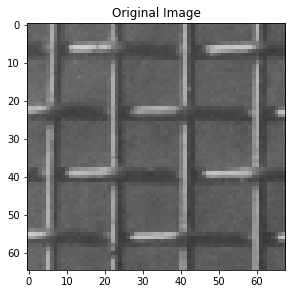

In [19]:
# we need to first read the sample image and convert it to a binary representation
SampleImage = io.imread(input_path + sample_img)

io.imshow(SampleImage)
plt.title('Original Image')
io.show()

# shrink to range between 0 and 1
SampleImage = SampleImage / 255.0

In [22]:
'''
Let SampleImage contain the image we are sampling from and let Image be the mostly empty 
image that we want to fill in (if synthesizing from scratch, it should contain a 3-by-3 
seed in the center randomly taken from SampleImage, for constrained synthesis it should 
contain all the known pixels). 
'''

# the resulting image given dimensions
Image = np.zeros((out_width,out_height))

# first we need to get the 3 by 3 seed image from our sample image
(r, c) = np.shape(SampleImage)

x1 = randint(0, r - seed_size)
y1 = randint(0, c - seed_size)
x2 = x1 + seed_size
y2 = y1 + seed_size

SeedImage = SampleImage[x1:x2, y1:y2]

# next we have to put the seed image in the center of the sample image
center_row = int(out_width/2)
center_col = int(out_height/2)
half_seed = int(seed_size/2)

# plus one because the last index doesn't count
Image[center_row-half_seed:center_row+half_seed+1, center_col-half_seed:center_col+half_seed+1] = SeedImage

# map to mark the pixels that we have synthesized already
ValidMask = np.zeros_like(Image)
ValidMask[center_row-half_seed:center_row+half_seed+1, center_col-half_seed:center_col+half_seed+1] = np.ones_like(SeedImage)

In [ ]:
'''
Function GetUnfilledNeighbors() returns a list of all unfilled pixels that have filled 
pixels as their neighbors (the image is subtracted from its morphological dilation)
'''
def GetUnfilledNeighbors():
    